## Import Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib inline

In [3]:
dataset = pd.read_csv('data/2017-06-potong-3-new-freq.csv')
data = dataset.copy()

## Dealing with time

In [4]:
data['timestamp'] = pd.to_datetime(dataset['timestamp'])

def get_day_of_week(dt):
    return dt.weekday()
def get_hour(dt):
    return dt.hour

data['day_of_week'] = data['timestamp'].apply(get_day_of_week)
data['hour'] = data['timestamp'].apply(get_hour)

## Duplicate data for training/testing

In [5]:
# # 3nd previous point
temp_data3 = data.copy()
temp_data3['last_point_time'] = temp_data3['timestamp'].shift(3)
temp_data3['second_from_last_point'] = (temp_data3['timestamp'] - temp_data3['timestamp'].shift(3)).dt.total_seconds()
temp_data3['distance_from_last_point'] = temp_data3['linear_ref'] - temp_data3['linear_ref'].shift(3)
temp_data3['last_point_location'] = temp_data3['linear_ref'].shift(3)
temp_data3['last_point_lat'] = temp_data3['lat'].shift(3)
temp_data3['last_point_lon'] = temp_data3['lon'].shift(3)
temp_data3['last_point_speed'] = temp_data3['speed'].shift(3)

# # 2nd previous point
temp_data = data.copy()
temp_data['last_point_time'] = temp_data['timestamp'].shift(2)
temp_data['second_from_last_point'] = (temp_data['timestamp'] - temp_data['timestamp'].shift(2)).dt.total_seconds()
temp_data['distance_from_last_point'] = temp_data['linear_ref'] - temp_data['linear_ref'].shift(2)
temp_data['last_point_location'] = temp_data['linear_ref'].shift(2)
temp_data['last_point_lat'] = temp_data['lat'].shift(2)
temp_data['last_point_lon'] = temp_data['lon'].shift(2)
temp_data['last_point_speed'] = temp_data['speed'].shift(2)


# # Last point
data['last_point_time'] = data['timestamp'].shift()
data['second_from_last_point'] = (data['timestamp'] - data['timestamp'].shift()).dt.total_seconds()
data['distance_from_last_point'] = data['linear_ref'] - data['linear_ref'].shift()
data['last_point_location'] = data['linear_ref'].shift()
data['last_point_lat'] = data['lat'].shift()
data['last_point_lon'] = data['lon'].shift()
data['last_point_speed'] = data['speed'].shift()


In [6]:
data

,vid,timestamp,trip_id,linear_ref,speed,direction,lat,lon,route_length_in_meter,distance_from_route_in_meter,day_of_week,hour,last_point_time,second_from_last_point,distance_from_last_point,last_point_location,last_point_lat,last_point_lon,last_point_speed
0,117620103021,2017-05-01 05:57:55,1,0.980654,16,in,7.865700,98.394317,15561,3.604501,0,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,117620103021,2017-05-01 05:58:55,1,0.949510,39,in,7.868683,98.391683,15561,7.925984,0,5,2017-05-01 05:57:55,60.0,-0.031144,0.980654,7.865700,98.394317,16.0
2,117620103021,2017-05-01 05:59:55,1,0.921781,32,in,7.872167,98.390017,15561,4.649478,0,5,2017-05-01 05:58:55,60.0,-0.027729,0.949510,7.868683,98.391683,39.0
3,117620103021,2017-05-01 06:00:55,1,0.875107,41,in,7.876950,98.387550,15561,9.839113,0,6,2017-05-01 05:59:55,60.0,-0.046674,0.921781,7.872167,98.390017,32.0
4,117620103021,2017-05-01 06:01:54,1,0.829956,36,in,7.879517,98.382350,15561,15.625715,0,6,2017-05-01 06:00:55,59.0,-0.045151,0.875107,7.876950,98.387550,41.0
5,117620103021,2017-05-01 06:02:54,1,0.792755,44,in,7.880383,98.377317,15561,8.427758,0,6,2017-05-01 06:01:54,60.0,-0.037201,0.829956,7.879517,98.382350,36.0
6,117620103021,2017-05-01 06:03:54,2,0.250973,43,out,7.880833,98.370483,15832,3.221549,0,6,2017-05-01 06:02:54,60.0,-0.541782,0.792755,7.880383,98.377317,44.0
7,117620103021,2017-05-01 06:04:54,2,0.299762,24,out,7.881567,98.363933,15832,0.456722,0,6,2017-05-01 06:03:54,60.0,0.048790,0.250973,7.880833,98.370483,43.0
8,117620103021,2017-05-01 06:05:54,2,0.344204,40,out,7.887317,98.366500,15832,7.524923,0,6,2017-05-01 06:04:54,60.0,0.044442,0.299762,7.881567,98.363933,24.0
9,117620103021,2017-05-01 06:06:54,2,0.381966,0,out,7.888350,98.370383,15832,0.954903,0,6,2017-05-01 06:05:54,60.0,0.037762,0.344204,7.887317,98.366500,40.0


## Check Lag Time frequency from actual data

/home/aiy/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/aiy/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


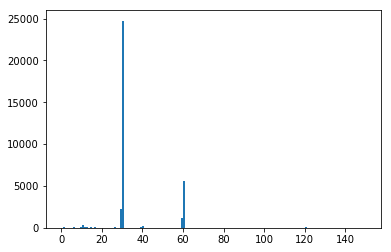

In [7]:
plt.hist(data['second_from_last_point'], bins=150, range=(0,150))
plt.show()

## append all the data

In [8]:
data = pd.concat([data, temp_data, temp_data3])

## Remove Missing data and Outlier

In [9]:
data.dropna(inplace=True)
data = data.drop(data[data['distance_from_last_point'] <= 0].index)
data = data.drop(data[data['distance_from_last_point'] > 0.2].index)
data = data.drop(data[data['second_from_last_point'] > 1000].index)

## Add location zone

In [10]:
data['last_point_location_zone'] = (data['last_point_location'] * 10000).apply(math.floor)
data[data['last_point_location_zone'] > 10000] = 10000
data[data['last_point_location_zone'] < 0] = 0

## Filter relavant data

In [11]:
data = data[['linear_ref', 'direction', 'day_of_week', 'hour', 'last_point_speed',
             'last_point_location', 'second_from_last_point']]
#data = data[['lat', 'lon', 'direction', 'day_of_week', 'hour', 'speed',
#             'second_from_last_point',  'last_point_lat', 'last_point_lon']]

#data = data[['distance_from_last_point', 'direction', 'day_of_week', 'hour', 'speed',
#             'second_from_last_point', 'last_point_location']]

## Split Features and Label

In [12]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

## Encode data & Train/Test split

In [13]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_direction = LabelEncoder()
X[:, 0] = labelencoder_direction.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Machine Learning Algorithm

In [15]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()
# regressor.fit(X_train, y_train)

from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

#from sklearn.linear_model import MultiTaskElasticNet
#regressor = MultiTaskElasticNet()
#regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
score

0.99623723651136531

## Exploring the results

In [17]:
data

,linear_ref,direction,day_of_week,hour,last_point_speed,last_point_location,second_from_last_point
9,0.381966,out,0,6,40.0,0.344204,60.0
10,0.389191,out,0,6,0.0,0.381966,59.0
11,0.434615,out,0,6,38.0,0.389191,60.0
12,0.462533,out,0,6,45.0,0.434615,60.0
13,0.489000,out,0,6,29.0,0.462533,60.0
14,0.519698,out,0,6,37.0,0.489000,60.0
15,0.535329,out,0,6,42.0,0.519698,60.0
16,0.562077,out,0,6,0.0,0.535329,59.0
17,0.600321,out,0,6,33.0,0.562077,60.0
18,0.638172,out,0,6,39.0,0.600321,60.0


In [18]:
X[0,:]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   6.        ,
        40.        ,   0.34420384,  60.        ])

In [19]:
y_diff = y_pred - y_test

In [20]:
X_test_65 = X_test[X_test[:, -1] < 65]
y_diff_65 = y_diff[X_test[:, -1] < 65]

In [21]:
print(y_diff_65.mean()*15561)
print(y_diff_65.std()*15561)

20.9663401588
152.13237069


In [22]:
y_diff_more_65 = y_diff[X_test[:, -1] >= 65]
print(y_diff_more_65.mean()*15561)
print(y_diff_more_65.std()*15561)

-35.2905062742
327.769865129


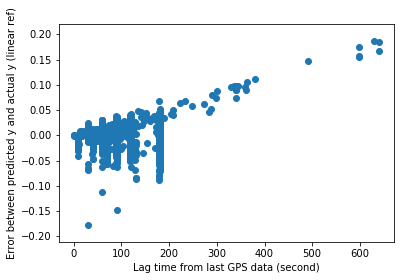

In [23]:
plt.scatter(X_test[:,-1], y_diff)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (linear ref)')
plt.show()

In [24]:
# len(X_test[X_test[:, 6] == 0])

In [25]:
X_test_in = X_test[X_test[:, 6] == 0]
y_test_in = y_test[X_test[:, 6] == 0]
X_test_out = X_test[X_test[:, 6] == 1]
y_test_out = y_test[X_test[:, 6] == 1]
y_diff_in = y_diff[X_test[:, 6] == 0]
y_diff_out = y_diff[X_test[:, 6] == 1]

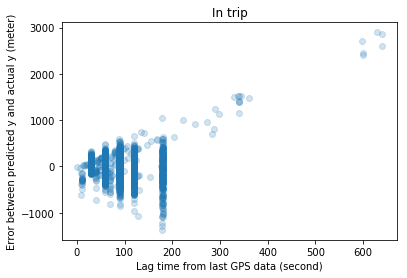

In [26]:
plt.scatter(X_test_in[:,-1], y_diff_in*15561, alpha=0.2)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('In trip')
plt.show()

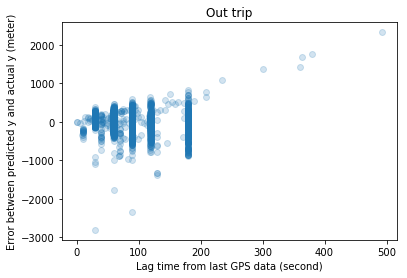

In [27]:
plt.scatter(X_test_out[:,-1], y_diff_out*15832, alpha=0.2)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Out trip')
plt.show()

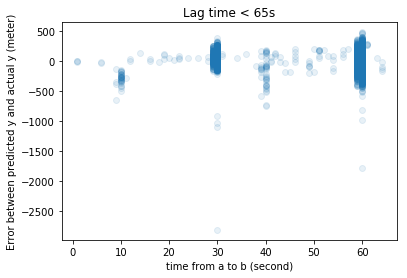

In [28]:
plt.scatter(X_test_65[:,-1], y_diff_65*15832, alpha=0.1)
plt.xlabel('time from a to b (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Lag time < 65s')
plt.show()

In [29]:
# y_diff[(X_test[:, -1] <11) & (X_test[:, -1] > 9)] * 15832

In [30]:
# data[(data.iloc[:, -1] <31) & (data.iloc[:, -1] > 29)]

In [31]:
# dataset.iloc[7000:7050, :]

(array([  2.10000000e+01,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   9.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.50000000e+01,   3.30000000e+02,
          1.70000000e+01,   0.00000000e+00,   4.00000000e+00,
          2.00000000e+01,   2.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   2.10000000e+01,   7.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   1.68000000e+03,
          1.91240000e+04,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   8.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   2.00000000e+01,   1.44000000e+02,
          1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   9.61000000e+02,
        

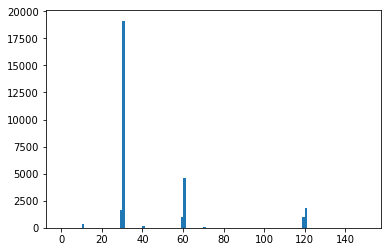

In [32]:
plt.hist(data.iloc[0:30000,-1], bins=120, range=(0,150))

In [33]:
data

,linear_ref,direction,day_of_week,hour,last_point_speed,last_point_location,second_from_last_point
9,0.381966,out,0,6,40.0,0.344204,60.0
10,0.389191,out,0,6,0.0,0.381966,59.0
11,0.434615,out,0,6,38.0,0.389191,60.0
12,0.462533,out,0,6,45.0,0.434615,60.0
13,0.489000,out,0,6,29.0,0.462533,60.0
14,0.519698,out,0,6,37.0,0.489000,60.0
15,0.535329,out,0,6,42.0,0.519698,60.0
16,0.562077,out,0,6,0.0,0.535329,59.0
17,0.600321,out,0,6,33.0,0.562077,60.0
18,0.638172,out,0,6,39.0,0.600321,60.0


## Lag time = 10

In [34]:
y_diff_10 = y_diff[(X_test[:, -1] >= 9) & (X_test[:, -1] <= 11)]
X_test_10 = X_test[(X_test[:, -1] >= 9) & (X_test[:, -1] <= 11)]

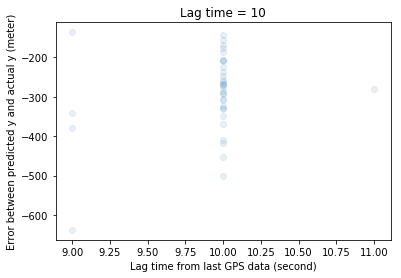

In [35]:
plt.scatter(X_test_10[:,-1], y_diff_10*15832, alpha=0.1)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Lag time = 10')
plt.show()

In [36]:
print("Mean (at lag_time = 10s) : " + str(y_diff_10.mean()*15696) + " meters")
print("SD (at lag_time = 10s) : " + str(y_diff_10.std()*15696) + " meters")

Mean (at lag_time = 10s) : -289.291086554 meters
SD (at lag_time = 10s) : 102.012074458 meters


## Lag time = 30

In [37]:
y_diff_30 = y_diff[(X_test[:, -1] >= 29) & (X_test[:, -1] <= 31)]
X_test_30 = X_test[(X_test[:, -1] >= 29) & (X_test[:, -1] <= 31)]

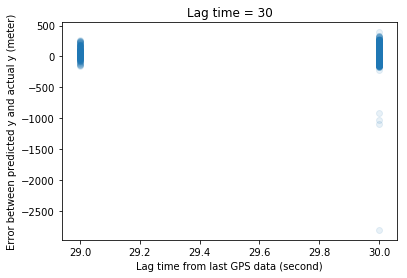

In [38]:
plt.scatter(X_test_30[:,-1], y_diff_30*15832, alpha=0.1)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Lag time = 30')
plt.show()

In [39]:
print("Mean (at lag_time = 29s/30s) : " + str(y_diff_30.mean()*15696) + " meters")
print("SD (at lag_time = 29s/30s) : " + str(y_diff_30.std()*15696) + " meters")

Mean (at lag_time = 29s/30s) : 50.7149414202 meters
SD (at lag_time = 29s/30s) : 117.100427706 meters


## Lag time = 60

In [40]:
y_diff_60 = y_diff[(X_test[:, -1] >= 59) & (X_test[:, -1] <= 61)]
X_test_60 = X_test[(X_test[:, -1] >= 59) & (X_test[:, -1] <= 61)]

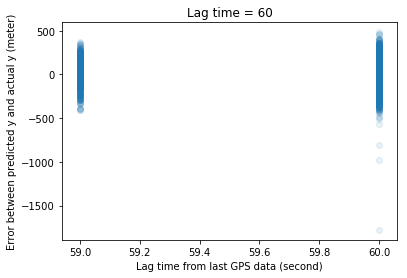

In [41]:
plt.scatter(X_test_60[:,-1], y_diff_60*15832, alpha=0.1)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Lag time = 60')
plt.show()

In [42]:
print("Mean (at lag_time = 59s/60s) : " + str(y_diff_60.mean()*15696) + " meters")
print("SD (at lag_time = 59s/60s) : " + str(y_diff_60.std()*15696) + " meters")

Mean (at lag_time = 59s/60s) : 5.10577363802 meters
SD (at lag_time = 59s/60s) : 167.837896942 meters


(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    1.,    2.,    4.,
          13.,   26.,   34.,   47.,   80.,  100.,  139.,  164.,  178.,
         212.,  213.,  230.,  230.,  213.,  210.,  160.,  135.,  112.,
          72.,   43.,   27.,   10.,    1.,    4.]),
 array([-0.11235674, -0.10997613, -0.10759551, -0.1052149 , -0.10283429,
        -0.10045368, -0.09807306, -0.09569245, -0.09331184, -0.09093123,
        -0.08855062, -0.08617   , -0.08378939, -0.08140878, -0.07902817,
        -0.07664755, -0.07426694, -0.07188633, -0.06950572, -0.0671251 ,
        -0.06474449, -0.06236388, -0.05998327, -0.05760266, -0.05522204,
        -0.05284143, -0.05046082, -0.04808021, -0.04569959, -0.04331898,
        -0.04093837, -0.03855776, -0.03617714, -0.03379653, -0.03141592,
        -0.

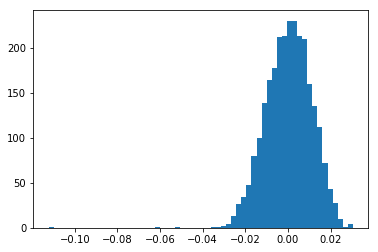

In [43]:
plt.hist(y_diff_60, bins= 60)

## Lag time = 120

In [44]:
y_diff_120 = y_diff[(X_test[:, -1] >= 119) & (X_test[:, -1] <= 121)]
X_test_120 = X_test[(X_test[:, -1] >= 119) & (X_test[:, -1] <= 121)]

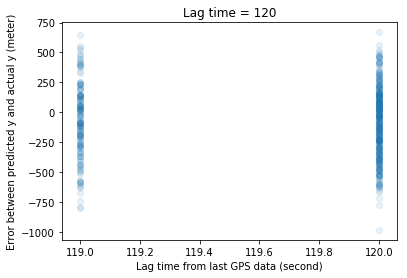

In [45]:
plt.scatter(X_test_120[:,-1], y_diff_120*15832, alpha=0.1)
plt.xlabel('Lag time from last GPS data (second)')
plt.ylabel('Error between predicted y and actual y (meter)')
plt.title('Lag time = 120')
plt.show()

In [46]:
print("Mean (at lag_time = 119s/120s) : " + str(y_diff_120.mean()*15696) + " meters")
print("SD (at lag_time = 119s/120s) : " + str(y_diff_120.std()*15696) + " meters")

Mean (at lag_time = 119s/120s) : -79.3125188424 meters
SD (at lag_time = 119s/120s) : 289.665485573 meters
